<a href="https://colab.research.google.com/github/orifelszer/CrimeData/blob/eden-branch/Anomaly_detectuon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd  # לעבודה עם נתונים טבלאיים
import matplotlib.pyplot as plt  # להצגת גרפים
import seaborn as sns

In [3]:
import os
import zipfile

# הורדת הנתונים מה-GitHub
!git clone https://github.com/orifelszer/CrimeData.git

# הגדרת התיקייה לאחר ההורדה
zip_folder = 'CrimeData'

# הגדרת נתיבים ישירים לשני הקבצים
zip_files = [
    os.path.join(zip_folder, 'Clean_data_unsupervised_part1.zip'),
    os.path.join(zip_folder, 'Clean_data_unsupervised_part2.zip')
]

# רשימה לשמירת נתיבי הקבצים שנפרסו
extracted_folders = []

# פריסת קבצי ה-ZIP
for zip_file in zip_files:
    extract_path = zip_file.replace('.zip', '')  # יצירת שם תיקייה לפי שם הקובץ

    # בדיקה אם הקובץ קיים
    if os.path.exists(zip_file):
        # בדיקה אם התיקייה כבר נפרסה
        if not os.path.exists(extract_path):
            with zipfile.ZipFile(zip_file, 'r') as zip_ref:
                zip_ref.extractall(extract_path)
            print(f"Extracted: {zip_file} -> {extract_path}")
        else:
            print(f"Skipped: {zip_file} (Already extracted)")
    else:
        print(f"File not found: {zip_file}")

    extracted_folders.append(extract_path)

# איחוד קבצי CSV שפורסו
dataframes = []

for folder in extracted_folders:
    for file_name in os.listdir(folder):
        file_path = os.path.join(folder, file_name)
        if file_name.endswith('.csv'):
            df_temp = pd.read_csv(file_path)
            dataframes.append(df_temp)

# איחוד כל הנתונים למסגרת נתונים אחת
combined_df = pd.concat(dataframes, ignore_index=True)

# הצגת מסגרת הנתונים המאוחדת
print(f"Combined dataset contains {combined_df.shape[0]} rows and {combined_df.shape[1]} columns.")

fatal: destination path 'CrimeData' already exists and is not an empty directory.
Skipped: CrimeData/Clean_data_unsupervised_part1.zip (Already extracted)
Skipped: CrimeData/Clean_data_unsupervised_part2.zip (Already extracted)
Combined dataset contains 1686927 rows and 19 columns.


In [4]:
combined_df

,FictiveIDNumber,Year,Yeshuv,PoliceDistrict,PoliceMerhav,PoliceStation,StatisticArea,StatisticGroup,StatisticType,Quarter_numeric,Quarter_sin,Quarter_cos,YeshuvCrimeRate,CrimeTrend,CrimeTrend_CrimeRate,StationCrimeRateAvg,YeshuvHistoricalCrimeRate,StationsNearbyCount,CityOrMoshav_Moshav
0,219001,2020,50,3,19,50,1236,10,14,1,1.000000e+00,6.123234e-17,0.596563,4.523112,0.553678,0.601860,0.596563,4.50001,False
1,645389,2020,70,3,18,63,704,3,97,2,1.224647e-16,-1.000000e+00,0.625726,4.523112,0.580618,0.631580,0.625726,4.50001,False
2,159531,2020,21,6,8,15,194,10,121,4,-2.449294e-16,1.000000e+00,0.266477,4.523112,0.248758,0.214669,0.266477,3.50001,True
3,867802,2020,33,2,15,40,246,4,27,2,1.224647e-16,-1.000000e+00,2.364671,4.523112,2.186987,2.424294,2.364671,2.00001,False
4,430084,2020,33,2,15,35,1080,9,1,2,1.224647e-16,-1.000000e+00,2.364671,4.523112,2.186987,2.340074,2.364671,2.00001,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1686922,1183189,2022,25,1,10,23,375,4,25,4,-2.449294e-16,1.000000e+00,0.975553,5.523112,0.953929,0.992494,0.975553,3.00001,False
1686923,404203,2022,33,2,5,2,1388,1,83,2,1.224647e-16,-1.000000e+00,2.364671,5.523112,2.307743,2.424294,2.364671,2.00001,False
1686924,726876,2022,33,2,15,35,915,4,27,3,-1.000000e+00,-1.836970e-16,2.364671,5.523112,2.307743,2.340074,2.364671,2.00001,False
1686925,26860,2022,33,2,15,35,682,4,25,3,-1.000000e+00,-1.836970e-16,2.364671,5.523112,2.307743,2.340074,2.364671,2.00001,False


In [37]:
# ניקוי ערכים חריגים
combined_df = combined_df[(combined_df['YeshuvCrimeRate'] >= 0) & (combined_df['StationsNearbyCount'] >= 0)]

# קיבוץ הנתונים לפי יישוב
yeshuv_grouped = combined_df.groupby('Yeshuv').agg(
    YeshuvCrimeRateAvg=('YeshuvCrimeRate', 'mean'),
    StationsNearbyAvg=('StationsNearbyCount', 'mean'),
    CrimeTrendAvg=('CrimeTrend', 'mean')
).reset_index()

In [38]:
from sklearn.ensemble import IsolationForest

# הגדרת המודל והכנת הנתונים
iso_forest = IsolationForest(contamination=0.05, random_state=42)
yeshuv_grouped['Anomaly'] = iso_forest.fit_predict(yeshuv_grouped[['YeshuvCrimeRateAvg', 'StationsNearbyAvg', 'CrimeTrendAvg']])

# זיהוי החריגים
outliers = yeshuv_grouped[yeshuv_grouped['Anomaly'] == -1]
print("יישובים חריגים שזוהו:", outliers)


יישובים חריגים שזוהו:     Yeshuv  YeshuvCrimeRateAvg  StationsNearbyAvg  CrimeTrendAvg  Anomaly
5        5            0.034149           0.000010       4.786579       -1
33      33            2.364671           1.998603       4.761460       -1
34      34            0.000845           4.500010       4.947420       -1
68      68            0.056971           4.000010       5.020835       -1
80      80            2.490922           3.500010       4.646094       -1


In [39]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
yeshuv_grouped['Anomaly_LOF'] = lof.fit_predict(yeshuv_grouped[['YeshuvCrimeRateAvg', 'StationsNearbyAvg', 'CrimeTrendAvg']])


In [40]:
from sklearn.svm import OneClassSVM

svm = OneClassSVM(nu=0.05, kernel='rbf')
yeshuv_grouped['Anomaly_SVM'] = svm.fit_predict(yeshuv_grouped[['YeshuvCrimeRateAvg', 'StationsNearbyAvg', 'CrimeTrendAvg']])


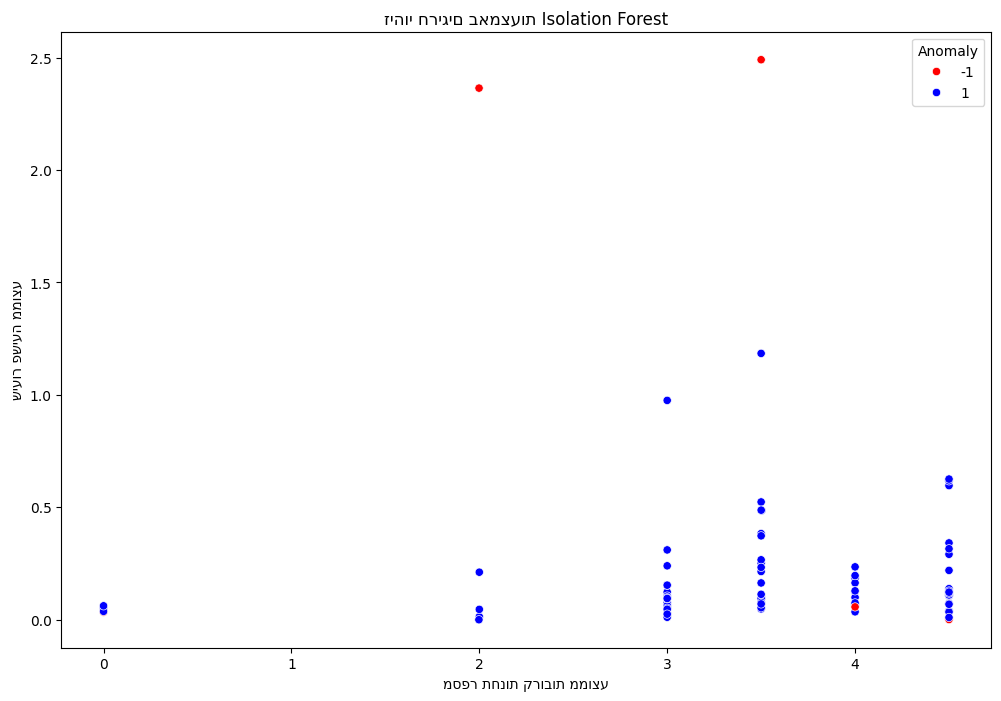

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# גרף פיזור המציג את החריגים
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=yeshuv_grouped['StationsNearbyAvg'],
    y=yeshuv_grouped['YeshuvCrimeRateAvg'],
    hue=yeshuv_grouped['Anomaly'],
    palette={-1: 'red', 1: 'blue'}
)
plt.title("זיהוי חריגים באמצעות Isolation Forest")
plt.xlabel("מספר תחנות קרובות ממוצע")
plt.ylabel("שיעור פשיעה ממוצע")
plt.show()


🔴 חריגים שזוהו על ידי Isolation Forest:
    Yeshuv  YeshuvCrimeRateAvg  StationsNearbyAvg  CrimeTrendAvg  Anomaly  \
5        5            0.034149           0.000010       4.786579       -1   
33      33            2.364671           1.998603       4.761460       -1   
34      34            0.000845           4.500010       4.947420       -1   
68      68            0.056971           4.000010       5.020835       -1   
80      80            2.490922           3.500010       4.646094       -1   

    Anomaly_LOF  Anomaly_SVM  Anomaly_ISO  
5            -1            1           -1  
33            1           -1           -1  
34            1           -1           -1  
68            1            1           -1  
80           -1           -1           -1  

🔴 חריגים שזוהו על ידי Local Outlier Factor:
    Yeshuv  YeshuvCrimeRateAvg  StationsNearbyAvg  CrimeTrendAvg  Anomaly  \
5        5            0.034149            0.00001       4.786579       -1   
11      11            0.052595    

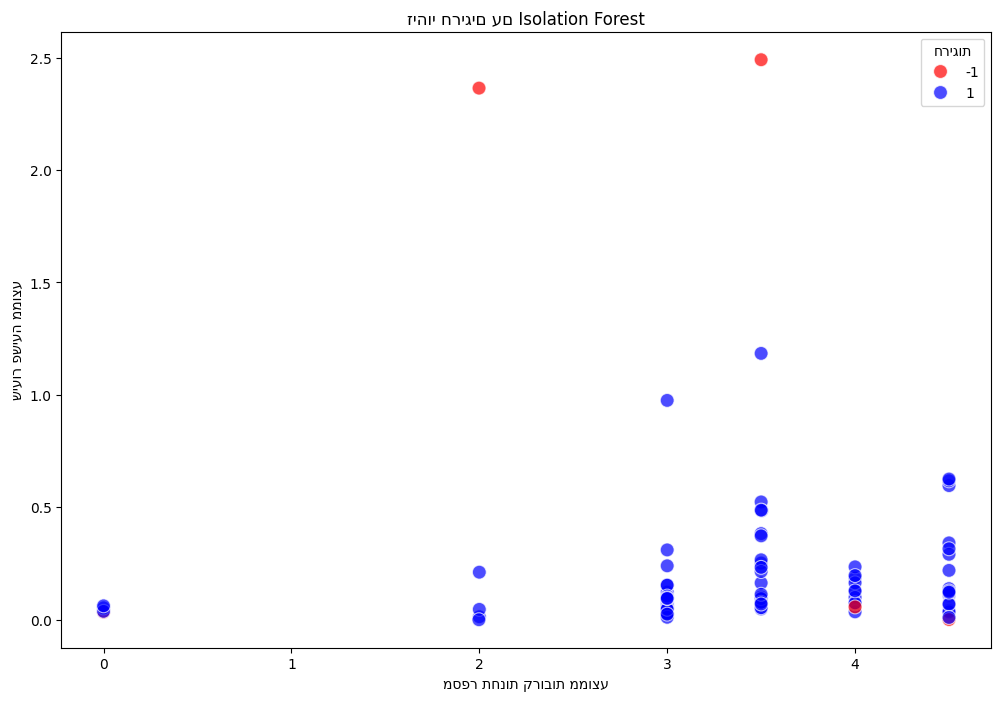

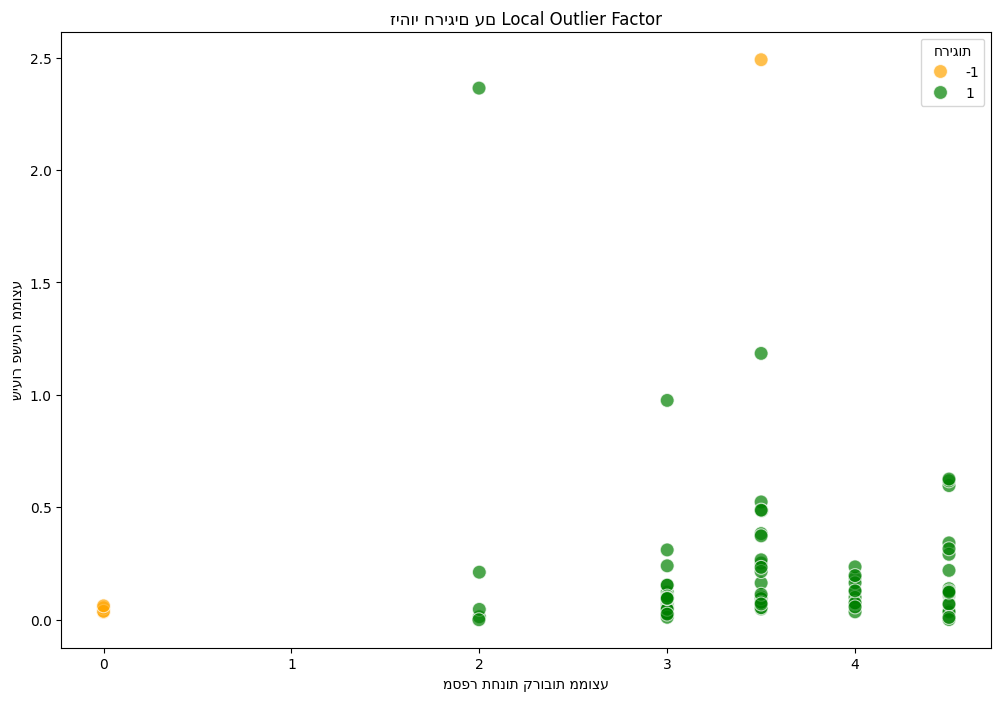

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor


# ====== שלב 1: זיהוי חריגים עם Isolation Forest ======
iso_forest = IsolationForest(contamination=0.05, random_state=42)
yeshuv_grouped['Anomaly_ISO'] = iso_forest.fit_predict(
    yeshuv_grouped[['YeshuvCrimeRateAvg', 'StationsNearbyAvg', 'CrimeTrendAvg']]
)

# סינון החריגים שנמצאו
outliers_iso = yeshuv_grouped[yeshuv_grouped['Anomaly_ISO'] == -1]
print("🔴 חריגים שזוהו על ידי Isolation Forest:")
print(outliers_iso)

# ====== שלב 2: זיהוי חריגים עם Local Outlier Factor (LOF) ======
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
yeshuv_grouped['Anomaly_LOF'] = lof.fit_predict(
    yeshuv_grouped[['YeshuvCrimeRateAvg', 'StationsNearbyAvg', 'CrimeTrendAvg']]
)

# סינון החריגים שנמצאו עם LOF
outliers_lof = yeshuv_grouped[yeshuv_grouped['Anomaly_LOF'] == -1]
print("\n🔴 חריגים שזוהו על ידי Local Outlier Factor:")
print(outliers_lof)

# ====== שלב 3: השוואה ויזואלית בין LOF ו- Isolation Forest ======
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=yeshuv_grouped['StationsNearbyAvg'],
    y=yeshuv_grouped['YeshuvCrimeRateAvg'],
    hue=yeshuv_grouped['Anomaly_ISO'],
    palette={-1: 'red', 1: 'blue'},
    s=100,
    alpha=0.7
)
plt.title("זיהוי חריגים עם Isolation Forest")
plt.xlabel("מספר תחנות קרובות ממוצע")
plt.ylabel("שיעור פשיעה ממוצע")
plt.legend(title="חריגות")
plt.show()

# גרף LOF
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=yeshuv_grouped['StationsNearbyAvg'],
    y=yeshuv_grouped['YeshuvCrimeRateAvg'],
    hue=yeshuv_grouped['Anomaly_LOF'],
    palette={-1: 'orange', 1: 'green'},
    s=100,
    alpha=0.7
)
plt.title("זיהוי חריגים עם Local Outlier Factor")
plt.xlabel("מספר תחנות קרובות ממוצע")
plt.ylabel("שיעור פשיעה ממוצע")
plt.legend(title="חריגות")
plt.show()


In [6]:
# שלב 3: קיבוץ הנתונים לפי יישוב (Yeshuv)
# חישוב שיעור פשיעה ממוצע, כמות תחנות ומגמת פשיעה לכל יישוב
yeshuv_grouped = combined_df.groupby('Yeshuv').agg(
    YeshuvCrimeRateAvg=('YeshuvCrimeRate', 'mean'),
    StationsNearbyAvg=('StationsNearbyCount', 'mean'),
    CrimeTrendAvg=('CrimeTrend', 'mean')
).reset_index()

In [7]:
# שלב 4: הצגת התפלגות הנתונים
print(yeshuv_grouped.describe())

          Yeshuv  YeshuvCrimeRateAvg  StationsNearbyAvg  CrimeTrendAvg
count  82.000000           82.000000          82.000000      82.000000
mean   40.500000            0.230774           3.439024       4.664904
std    23.815261            0.405026           1.040565       0.089090
min     0.000000            0.000010           0.000010       4.414179
25%    20.250000            0.058183           3.000010       4.615726
50%    40.500000            0.105327           3.500010       4.668997
75%    60.750000            0.229544           4.000010       4.699142
max    81.000000            2.490922           4.500010       5.020835


In [11]:
# מיון היישובים לפי פשיעה יורדת ומספר תחנות עולה
sorted_yeshuv = yeshuv_grouped.sort_values(by=['YeshuvCrimeRateAvg', 'StationsNearbyAvg'], ascending=[False, True])

# הצגת עשרת היישובים המובילים בפשיעה גבוהה ומעט תחנות
print("10 היישובים הבעייתיים ביותר לפי פשיעה ומספר תחנות:")
print(sorted_yeshuv.head(10))


10 היישובים הבעייתיים ביותר לפי פשיעה ומספר תחנות:
    Yeshuv  YeshuvCrimeRateAvg  StationsNearbyAvg  CrimeTrendAvg
80      80            2.490922           3.500010       4.646094
33      33            2.364671           1.998603       4.761460
8        8            1.184634           3.500010       4.706782
25      25            0.975553           3.000010       4.702239
70      70            0.625726           4.500010       4.627364
57      57            0.617891           4.499673       4.651610
50      50            0.596563           4.500010       4.657544
6        6            0.523885           3.500010       4.687727
24      24            0.487452           3.500246       4.597544
14      14            0.485299           3.502782       4.630808


המלצה על שלושת היישובים בהם יש פשיעה גבוהה ומספר תחנות נמוך:
    Yeshuv  YeshuvCrimeRateAvg  StationsNearbyAvg  CrimeTrendAvg
80      80            2.490922           3.500010       4.646094
33      33            2.364671           1.998603       4.761460
8        8            1.184634           3.500010       4.706782


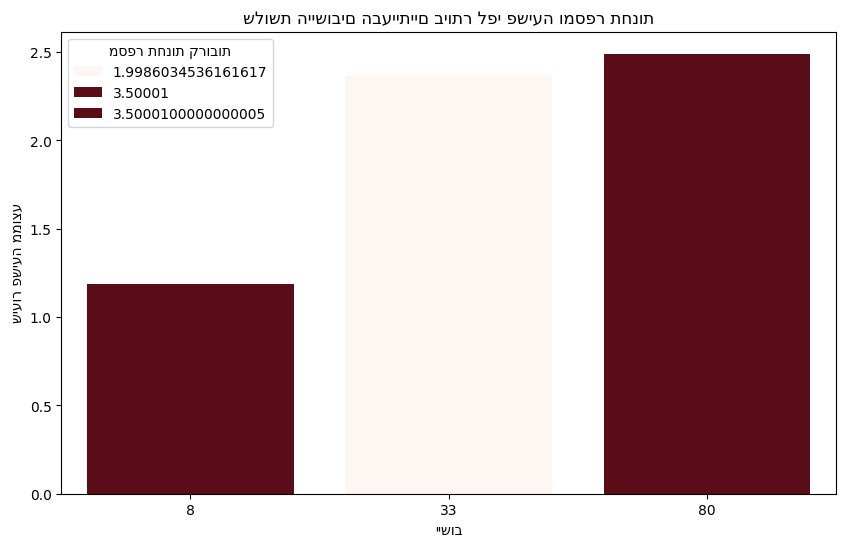

In [15]:
# מיון היישובים לפי שיעור הפשיעה (יורד) ומספר תחנות (עולה)
sorted_yeshuv_top3 = yeshuv_grouped.sort_values(
    by=['YeshuvCrimeRateAvg', 'StationsNearbyAvg'],
    ascending=[False, True]
).head(3)

# הצגת שלושת היישובים הבעייתיים ביותר
print("המלצה על שלושת היישובים בהם יש פשיעה גבוהה ומספר תחנות נמוך:")
print(sorted_yeshuv_top3)

# גרף ויזואלי להצגה ברורה של 3 היישובים הבעייתיים ביותר
plt.figure(figsize=(10, 6))
sns.barplot(
    x=sorted_yeshuv_top3['Yeshuv'],
    y=sorted_yeshuv_top3['YeshuvCrimeRateAvg'],
    hue=sorted_yeshuv_top3['StationsNearbyAvg'],
    palette="Reds"
)
plt.title("שלושת היישובים הבעייתיים ביותר לפי פשיעה ומספר תחנות")
plt.xlabel("יישוב")
plt.ylabel("שיעור פשיעה ממוצע")
plt.legend(title="מספר תחנות קרובות")
plt.show()


יישובים עם שיעור הפשיעה הגבוה ביותר (ללא קשר למספר התחנות):
    Yeshuv  YeshuvCrimeRateAvg  StationsNearbyAvg  CrimeTrendAvg
80      80            2.490922           3.500010       4.646094
33      33            2.364671           1.998603       4.761460
8        8            1.184634           3.500010       4.706782
25      25            0.975553           3.000010       4.702239
70      70            0.625726           4.500010       4.627364
57      57            0.617891           4.499673       4.651610
50      50            0.596563           4.500010       4.657544
6        6            0.523885           3.500010       4.687727
24      24            0.487452           3.500246       4.597544
14      14            0.485299           3.502782       4.630808

יישובים עם מספר התחנות הנמוך ביותר:
    Yeshuv  YeshuvCrimeRateAvg  StationsNearbyAvg  CrimeTrendAvg
40      40            0.037267           0.000010       4.701537
5        5            0.034149           0.000010       4.

<ipython-input-16-ffc4953deed0>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


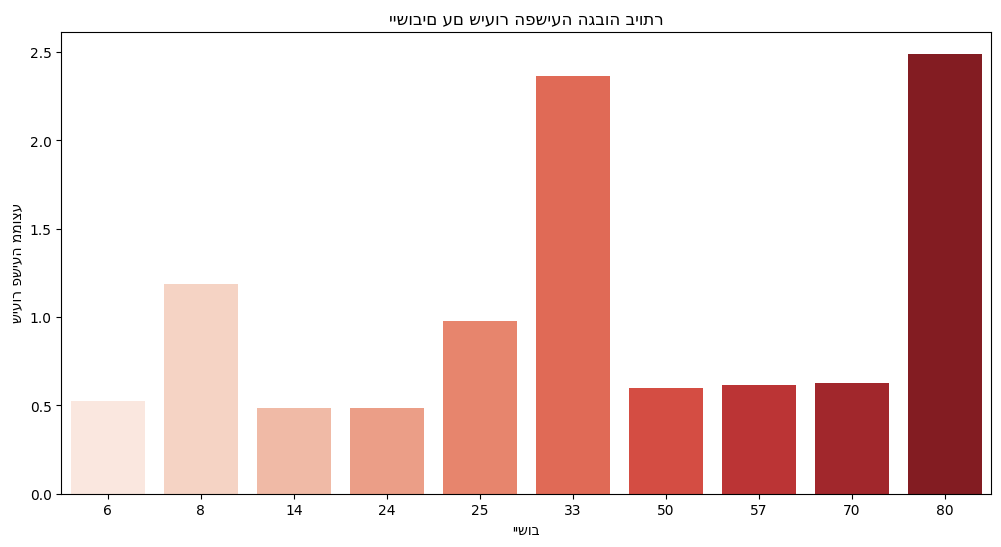

<ipython-input-16-ffc4953deed0>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


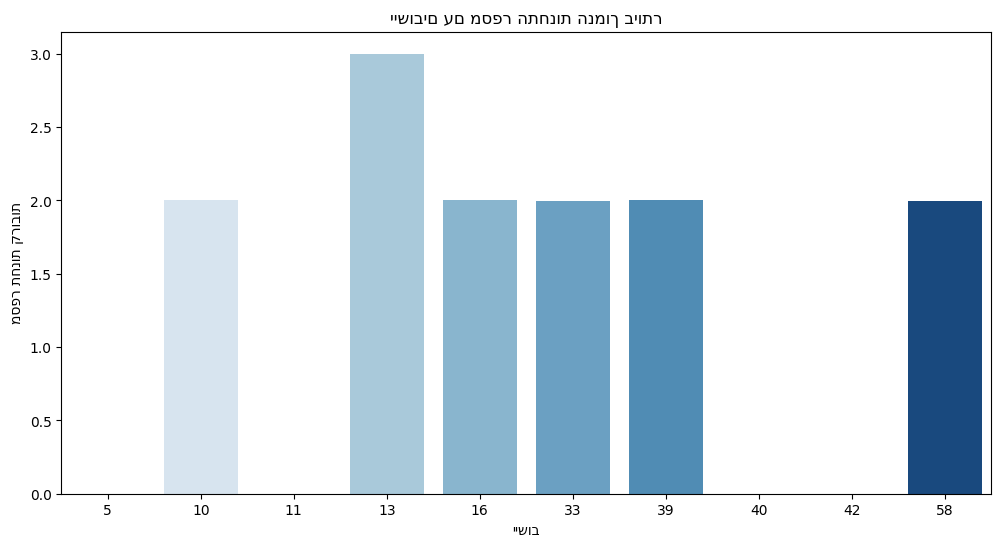

In [16]:
# השוואת יישובים עם שיעור פשיעה גבוה ללא קשר למספר התחנות
sorted_by_crime = yeshuv_grouped.sort_values(by="YeshuvCrimeRateAvg", ascending=False).head(10)

# השוואת יישובים עם מספר התחנות הנמוך ביותר
sorted_by_stations = yeshuv_grouped.sort_values(by="StationsNearbyAvg", ascending=True).head(10)

# הצגת שתי הרשימות
print("יישובים עם שיעור הפשיעה הגבוה ביותר (ללא קשר למספר התחנות):")
print(sorted_by_crime)

print("\nיישובים עם מספר התחנות הנמוך ביותר:")
print(sorted_by_stations)

# הדמיה להשוואה - שיעור פשיעה בלבד
plt.figure(figsize=(12, 6))
sns.barplot(
    x=sorted_by_crime['Yeshuv'],
    y=sorted_by_crime['YeshuvCrimeRateAvg'],
    palette="Reds"
)
plt.title("יישובים עם שיעור הפשיעה הגבוה ביותר")
plt.xlabel("יישוב")
plt.ylabel("שיעור פשיעה ממוצע")
plt.show()

# הדמיה להשוואה - כמות תחנות בלבד
plt.figure(figsize=(12, 6))
sns.barplot(
    x=sorted_by_stations['Yeshuv'],
    y=sorted_by_stations['StationsNearbyAvg'],
    palette="Blues"
)
plt.title("יישובים עם מספר התחנות הנמוך ביותר")
plt.xlabel("יישוב")
plt.ylabel("מספר תחנות קרובות")
plt.show()

In [21]:
# חישוב יחס פשיעה למספר תחנות
yeshuv_grouped['CrimeToStationRatio'] = yeshuv_grouped['YeshuvCrimeRateAvg'] / yeshuv_grouped['StationsNearbyAvg']

# מיון לפי יחס הפשיעה הגבוה ביותר
high_crime_ratio = yeshuv_grouped.sort_values(by='CrimeToStationRatio', ascending=False).head(10)

# הצגת יישובים עם יחס פשיעה גבוה
print("יישובים עם יחס פשיעה למספר תחנות הגבוה ביותר:")
print(high_crime_ratio)


יישובים עם יחס פשיעה למספר תחנות הגבוה ביותר:
    Yeshuv  YeshuvCrimeRateAvg  StationsNearbyAvg  CrimeTrendAvg  \
42      42            0.061818           0.000010       4.668359   
11      11            0.052595           0.000010       4.699610   
40      40            0.037267           0.000010       4.701537   
5        5            0.034149           0.000010       4.786579   
33      33            2.364671           1.998603       4.761460   
80      80            2.490922           3.500010       4.646094   
8        8            1.184634           3.500010       4.706782   
25      25            0.975553           3.000010       4.702239   
6        6            0.523885           3.500010       4.687727   
24      24            0.487452           3.500246       4.597544   

    CrimeRateStd  StationsStd  CrimeToStationRatio  
42           0.0     0.000000          6181.813000  
11           0.0     0.000000          5259.514200  
40           0.0     0.000000          3726.66

In [23]:
# מיון יישובים עם מגמת פשיעה עולה
increasing_trend = yeshuv_grouped.sort_values(by="CrimeTrendAvg", ascending=False).head(10)

# הצגת יישובים בהם מגמת הפשיעה גבוהה
print("יישובים עם מגמת פשיעה גבוהה:")
print(increasing_trend)


יישובים עם מגמת פשיעה גבוהה:
    Yeshuv  YeshuvCrimeRateAvg  StationsNearbyAvg  CrimeTrendAvg  \
68      68            0.056971           4.000010       5.020835   
34      34            0.000845           4.500010       4.947420   
77      77            0.113133           3.500010       4.881712   
58      58            0.000010           1.997920       4.805910   
56      56            0.094946           3.000010       4.794460   
5        5            0.034149           0.000010       4.786579   
7        7            0.075382           3.000010       4.775001   
16      16            0.013233           2.000010       4.763848   
33      33            2.364671           1.998603       4.761460   
13      13            0.022032           3.000010       4.754275   

    CrimeRateStd  StationsStd  CrimeToStationRatio  
68           0.0     0.000000             0.014243  
34           0.0     0.000000             0.000188  
77           0.0     0.000000             0.032324  
58        

In [24]:
# חישוב מתאם פירסון
correlation = yeshuv_grouped[['YeshuvCrimeRateAvg', 'StationsNearbyAvg']].corr()
print("מתאם בין שיעור הפשיעה למספר התחנות:")
print(correlation)


מתאם בין שיעור הפשיעה למספר התחנות:
                    YeshuvCrimeRateAvg  StationsNearbyAvg
YeshuvCrimeRateAvg            1.000000          -0.000893
StationsNearbyAvg            -0.000893           1.000000


יישובים שעומדים בתנאים לאחר שינוי הקריטריונים:
    Yeshuv  YeshuvCrimeRateAvg  StationsNearbyAvg  CrimeTrendAvg
23      23            0.310474           3.000010       4.674427
25      25            0.975553           3.000010       4.702239
33      33            2.364671           1.998603       4.761460
52      52            0.239784           3.000010       4.675715


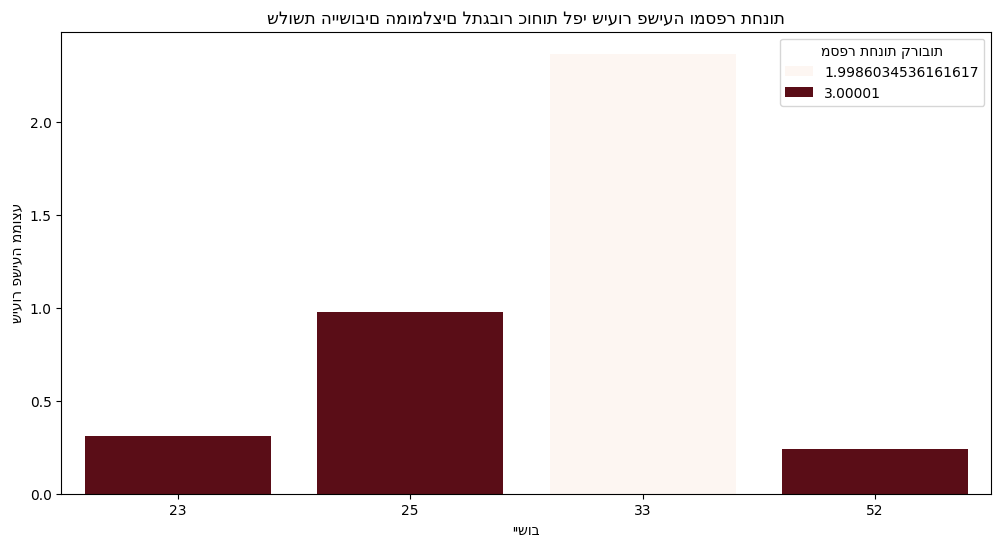


מסקנות מרכזיות מהניתוח:
1. נמצאו 3 יישובים בהם שיעור הפשיעה גבוה, מספר התחנות נמוך ומגמת הפשיעה בעלייה.
2. היישובים המובילים לתגבור כוחות הם אלה בהם יש פער משמעותי בין שיעור הפשיעה לבין כמות התחנות הקיימות.
3. ההמלצה המרכזית היא להגדיל את פריסת התחנות או לתגבר בנוכחות משטרתית באזורים אלו.
4. המגמות מראות כי באזורים בהם מגמת הפשיעה עולה, חיזוק הנוכחות המשטרתית עשוי להיות חיוני במניעת החרפה.



In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# הנחת עבודה: הנתונים נטענו ונורמלו מראש במשתנה 'combined_df'

# שלב 1: קיבוץ הנתונים לפי יישוב עם חישוב הממוצעים
yeshuv_grouped = combined_df.groupby('Yeshuv').agg(
    YeshuvCrimeRateAvg=('YeshuvCrimeRate', 'mean'),
    StationsNearbyAvg=('StationsNearbyCount', 'mean'),
    CrimeTrendAvg=('CrimeTrend', 'mean')
).reset_index()

# שלב 2: קביעת קריטריונים להמלצה - פשיעה גבוהה, תחנות נמוכות ומגמה עולה
# הגדרת ספים
# שימוש בממוצע במקום אחוזונים
high_crime_threshold = yeshuv_grouped['YeshuvCrimeRateAvg'].mean()
low_station_threshold = yeshuv_grouped['StationsNearbyAvg'].mean()
high_trend_threshold = yeshuv_grouped['CrimeTrendAvg'].mean()


# סינון יישובים שעונים על הקריטריונים
recommended_yeshuvs = yeshuv_grouped[
    (yeshuv_grouped['YeshuvCrimeRateAvg'] > high_crime_threshold) &
    (yeshuv_grouped['StationsNearbyAvg'] < low_station_threshold) &
    (yeshuv_grouped['CrimeTrendAvg'] > high_trend_threshold)
]

# # שלב 3: הצגת 3 היישובים המובילים עם צורך בתגבור כוחות
# top_3_recommendations = recommended_yeshuvs.sort_values(
#     by=['YeshuvCrimeRateAvg', 'CrimeTrendAvg'], ascending=[False, False]
# ).head(3)

# # הצגת הטבלה
# print("✅ טבלת ההמלצות: 3 היישובים המובילים עם צורך בתגבור כוחות:")
# print(top_3_recommendations)

# הצגת כל היישובים שעומדים בתנאי הסף במקום רק שלושה
recommended_yeshuvs = yeshuv_grouped[
    (yeshuv_grouped['YeshuvCrimeRateAvg'] > high_crime_threshold) &
    (yeshuv_grouped['StationsNearbyAvg'] < low_station_threshold) &
    (yeshuv_grouped['CrimeTrendAvg'] > high_trend_threshold)
]
print("יישובים שעומדים בתנאים לאחר שינוי הקריטריונים:")
print(recommended_yeshuvs)


# שלב 4: הדמיה - גרף עמודות המציג את הקשר בין שיעור הפשיעה ומספר התחנות
plt.figure(figsize=(12, 6))
sns.barplot(
    x=recommended_yeshuvs['Yeshuv'],
    y=recommended_yeshuvs['YeshuvCrimeRateAvg'],
    hue=recommended_yeshuvs['StationsNearbyAvg'],
    palette="Reds"
)
plt.title("שלושת היישובים המומלצים לתגבור כוחות לפי שיעור פשיעה ומספר תחנות")
plt.xlabel("יישוב")
plt.ylabel("שיעור פשיעה ממוצע")
plt.legend(title="מספר תחנות קרובות")
plt.show()

# שלב 5: מסקנות מוצעות להצגה בעבודה
conclusion_text = """
מסקנות מרכזיות מהניתוח:
1. נמצאו 3 יישובים בהם שיעור הפשיעה גבוה, מספר התחנות נמוך ומגמת הפשיעה בעלייה.
2. היישובים המובילים לתגבור כוחות הם אלה בהם יש פער משמעותי בין שיעור הפשיעה לבין כמות התחנות הקיימות.
3. ההמלצה המרכזית היא להגדיל את פריסת התחנות או לתגבר בנוכחות משטרתית באזורים אלו.
4. המגמות מראות כי באזורים בהם מגמת הפשיעה עולה, חיזוק הנוכחות המשטרתית עשוי להיות חיוני במניעת החרפה.
"""
print(conclusion_text)



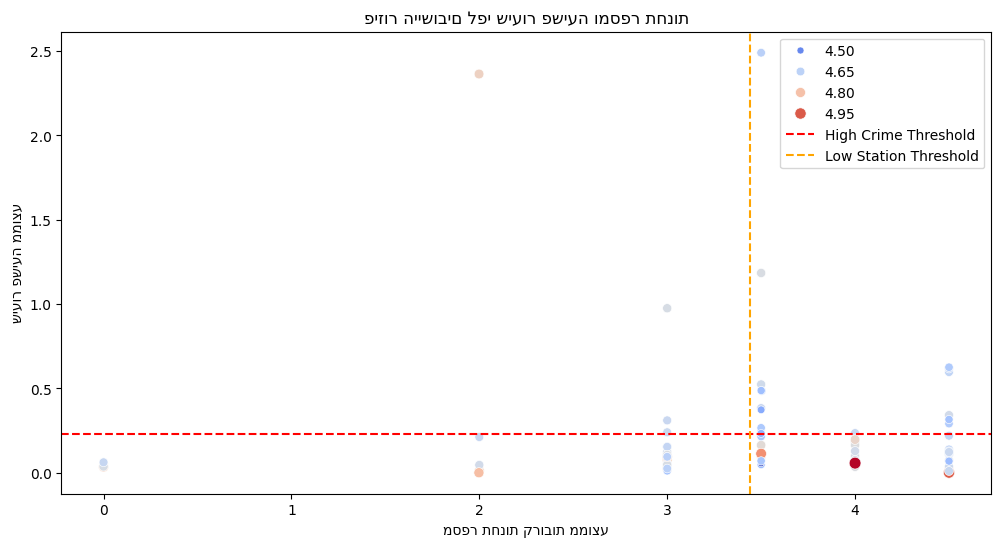

In [28]:
# גרף פיזור המציג את כל היישובים ביחס לשיעור פשיעה ומספר תחנות
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x=yeshuv_grouped['StationsNearbyAvg'],
    y=yeshuv_grouped['YeshuvCrimeRateAvg'],
    hue=yeshuv_grouped['CrimeTrendAvg'],
    size=yeshuv_grouped['CrimeTrendAvg'],
    palette="coolwarm"
)
plt.axhline(high_crime_threshold, color='red', linestyle='--', label='High Crime Threshold')
plt.axvline(low_station_threshold, color='orange', linestyle='--', label='Low Station Threshold')
plt.title("פיזור היישובים לפי שיעור פשיעה ומספר תחנות")
plt.xlabel("מספר תחנות קרובות ממוצע")
plt.ylabel("שיעור פשיעה ממוצע")
plt.legend()
plt.show()


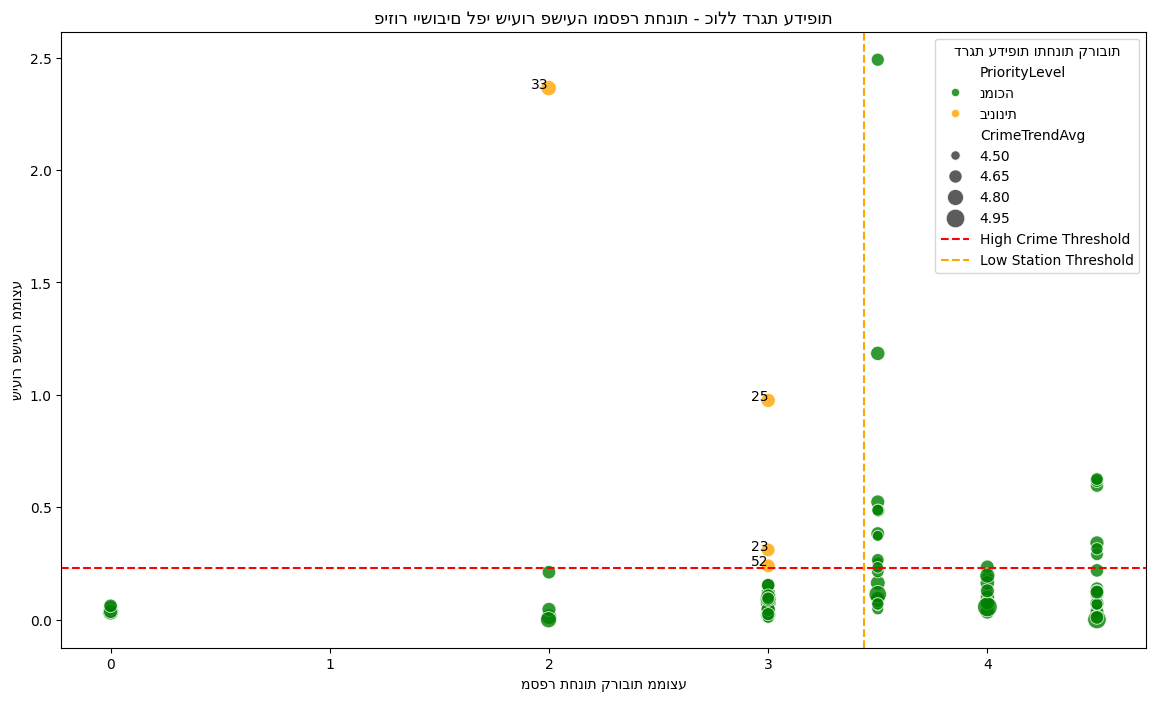

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# יצירת עותק מהנתונים עם דירוג עדיפות על סמך הקריטריונים
yeshuv_grouped['PriorityLevel'] = 'נמוכה'
yeshuv_grouped.loc[
    (yeshuv_grouped['YeshuvCrimeRateAvg'] > high_crime_threshold) &
    (yeshuv_grouped['StationsNearbyAvg'] < low_station_threshold) &
    (yeshuv_grouped['CrimeTrendAvg'] > high_trend_threshold),
    'PriorityLevel'
] = 'גבוהה'

yeshuv_grouped.loc[
    (yeshuv_grouped['YeshuvCrimeRateAvg'] > high_crime_threshold) &
    (yeshuv_grouped['StationsNearbyAvg'] < low_station_threshold),
    'PriorityLevel'
] = 'בינונית'

# מיפוי צבעים לפי דרגת עדיפות
priority_colors = {
    'גבוהה': 'red',
    'בינונית': 'orange',
    'נמוכה': 'green'
}

# יצירת גרף פיזור עם צבעים לפי דרגת עדיפות
plt.figure(figsize=(14, 8))
sns.scatterplot(
    x=yeshuv_grouped['StationsNearbyAvg'],
    y=yeshuv_grouped['YeshuvCrimeRateAvg'],
    hue=yeshuv_grouped['PriorityLevel'],
    size=yeshuv_grouped['CrimeTrendAvg'],
    sizes=(20, 200),
    palette=priority_colors,
    alpha=0.8
)

# הוספת קווי הסף
plt.axhline(high_crime_threshold, color='red', linestyle='--', label='High Crime Threshold')
plt.axvline(low_station_threshold, color='orange', linestyle='--', label='Low Station Threshold')

# הוספת תוויות יישובים על הנקודות
for index, row in yeshuv_grouped.iterrows():
    if row['PriorityLevel'] in ['גבוהה', 'בינונית']:  # רק יישובים עם עדיפות גבוהה/בינונית
        plt.text(row['StationsNearbyAvg'], row['YeshuvCrimeRateAvg'], str(row['Yeshuv']),
                 fontsize=10, ha='right')

# כותרות ופרטים נוספים
plt.title("פיזור יישובים לפי שיעור פשיעה ומספר תחנות - כולל דרגת עדיפות")
plt.xlabel("מספר תחנות קרובות ממוצע")
plt.ylabel("שיעור פשיעה ממוצע")
plt.legend(title="דרגת עדיפות ותחנות קרובות")
plt.show()


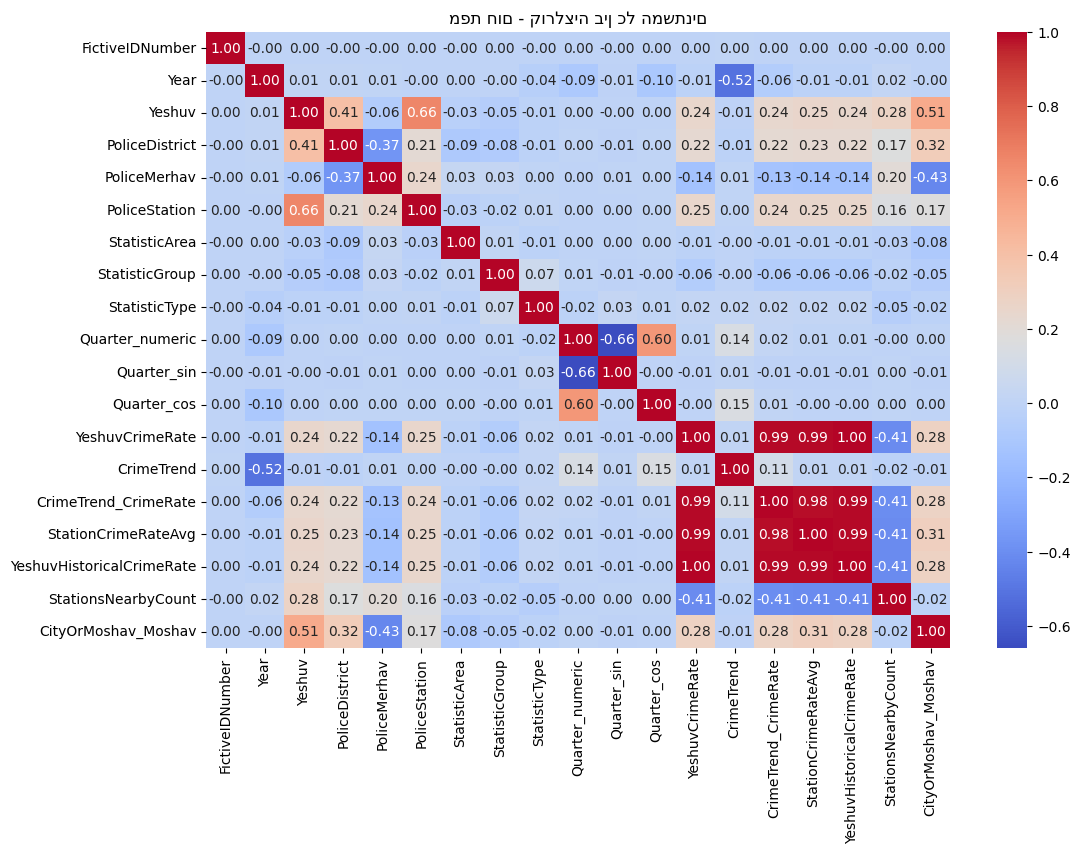

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# # קיבוץ הנתונים לפי יישוב וחישוב ממוצעים
# yeshuv_grouped = combined_df.groupby('Yeshuv').agg(
#     YeshuvCrimeRateAvg=('YeshuvCrimeRate', 'mean'),
#     StationsNearbyAvg=('StationsNearbyCount', 'mean'),
#     CrimeTrendAvg=('CrimeTrend', 'mean')
# ).reset_index()

# חישוב מטריצת הקורלציה עבור כל המשתנים המספריים
correlation_matrix = combined_df.corr()

# יצירת גרף Heatmap להצגת הקורלציות
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("מפת חום - קורלציה בין כל המשתנים")
plt.show()


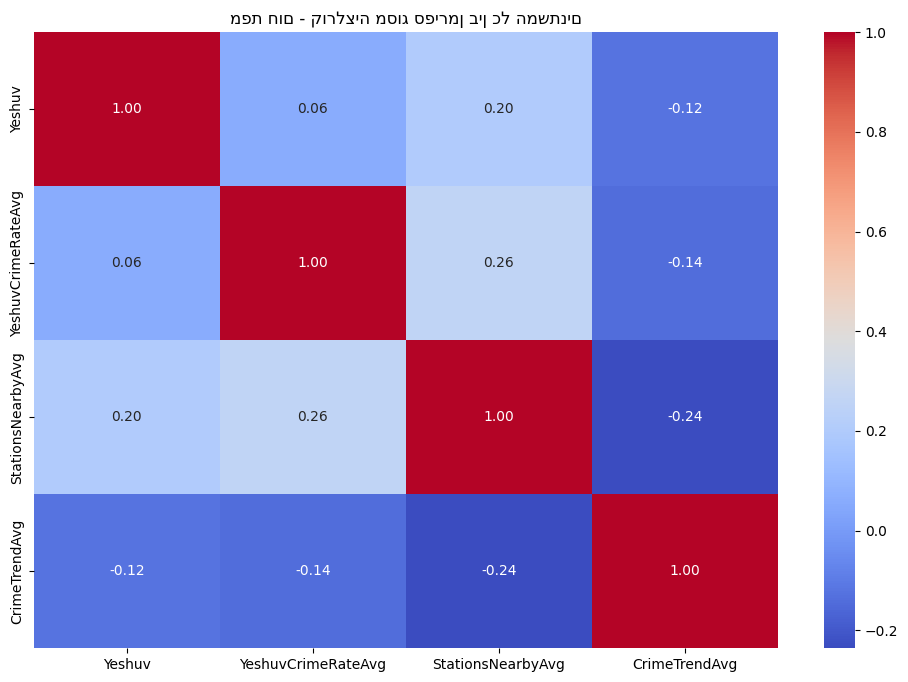

מטריצת קורלציה ספירמן:
                      Yeshuv  YeshuvCrimeRateAvg  StationsNearbyAvg  \
Yeshuv              1.000000            0.061264           0.201748   
YeshuvCrimeRateAvg  0.061264            1.000000           0.258551   
StationsNearbyAvg   0.201748            0.258551           1.000000   
CrimeTrendAvg      -0.123910           -0.141194          -0.236372   

                    CrimeTrendAvg  
Yeshuv                  -0.123910  
YeshuvCrimeRateAvg      -0.141194  
StationsNearbyAvg       -0.236372  
CrimeTrendAvg            1.000000  


In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# קיבוץ הנתונים לפי יישוב וחישוב ממוצעים
yeshuv_grouped = combined_df.groupby('Yeshuv').agg(
    YeshuvCrimeRateAvg=('YeshuvCrimeRate', 'mean'),
    StationsNearbyAvg=('StationsNearbyCount', 'mean'),
    CrimeTrendAvg=('CrimeTrend', 'mean')
).reset_index()

# חישוב קורלציה מסוג ספירמן
spearman_correlation = yeshuv_grouped.corr(method='spearman')

# יצירת גרף Heatmap להצגת הקורלציות
plt.figure(figsize=(12, 8))
sns.heatmap(spearman_correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("מפת חום - קורלציה מסוג ספירמן בין כל המשתנים")
plt.show()

# הצגת המטריצה המודפסת עצמה
print("מטריצת קורלציה ספירמן:")
print(spearman_correlation)


                            OLS Regression Results                            
Dep. Variable:     YeshuvCrimeRateAvg   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.024
Method:                 Least Squares   F-statistic:                   0.03217
Date:                Sun, 12 Jan 2025   Prob (F-statistic):              0.968
Time:                        15:18:59   Log-Likelihood:                -41.705
No. Observations:                  82   AIC:                             89.41
Df Residuals:                      79   BIC:                             96.63
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.3882      2.45

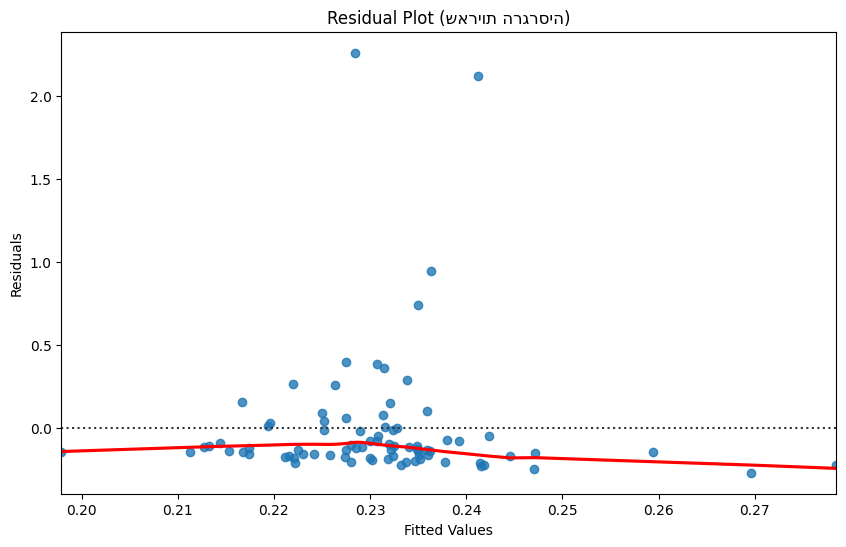

In [36]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns



# משתנה המטרה (Target)
y = yeshuv_grouped['YeshuvCrimeRateAvg']

# משתני ההסבר (Features)
X = yeshuv_grouped[['StationsNearbyAvg', 'CrimeTrendAvg']]

# הוספת קבוע (intercept) לרגרסיה
X = sm.add_constant(X)

# התאמת מודל רגרסיה לינארית מרובה
model = sm.OLS(y, X).fit()

# הצגת סיכום התוצאות הסטטיסטיות
print(model.summary())

# ויזואליזציה - תרשים שאריות לבדיקה
plt.figure(figsize=(10,6))
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True, line_kws={"color": "red"})
plt.title('Residual Plot (שאריות הרגרסיה)')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()
